**Importing Packages**

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

**Preparing Dataset**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Normalizing the input data**

In [14]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


**One-hot encoding**

In [15]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


**Building the model**

In [0]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

**Compiling the model**

In [0]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adagrad')

**Training the model**

In [18]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.2451 - acc: 0.9277 - val_loss: 0.1057 - val_acc: 0.9679
Epoch 2/20
 - 3s - loss: 0.1031 - acc: 0.9685 - val_loss: 0.0828 - val_acc: 0.9745
Epoch 3/20
 - 3s - loss: 0.0742 - acc: 0.9770 - val_loss: 0.0706 - val_acc: 0.9776
Epoch 4/20
 - 3s - loss: 0.0577 - acc: 0.9829 - val_loss: 0.0641 - val_acc: 0.9795
Epoch 5/20
 - 3s - loss: 0.0471 - acc: 0.9857 - val_loss: 0.0621 - val_acc: 0.9814
Epoch 6/20
 - 3s - loss: 0.0397 - acc: 0.9881 - val_loss: 0.0589 - val_acc: 0.9816
Epoch 7/20
 - 3s - loss: 0.0344 - acc: 0.9897 - val_loss: 0.0583 - val_acc: 0.9822
Epoch 8/20
 - 3s - loss: 0.0292 - acc: 0.9912 - val_loss: 0.0561 - val_acc: 0.9831
Epoch 9/20
 - 3s - loss: 0.0257 - acc: 0.9923 - val_loss: 0.0559 - val_acc: 0.9846
Epoch 10/20
 - 3s - loss: 0.0237 - acc: 0.9928 - val_loss: 0.0564 - val_acc: 0.9844
Epoch 11/20
 - 3s - loss: 0.0206 - acc: 0.9939 - val_loss: 0.0560 - val_acc: 0.9847
Epoch 12/20
 - 3s - loss: 0.0181 - 

**Plotting graph and results**

Test Loss 0.057253788807183445
Test Accuracy 98.46000000000001 %


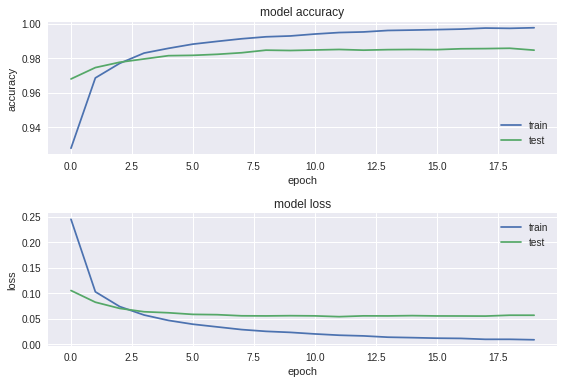

In [19]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1]*100 ,"%")